In [1]:
# Dataset https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [01:54<00:00, 20.7MB/s]
100% 2.06G/2.06G [01:54<00:00, 19.2MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os
train_covid19=os.listdir('/content/Data/train/COVID19')
train_normal=os.listdir('/content/Data/train/NORMAL')
train_pneumonia=os.listdir('/content/Data/train/PNEUMONIA')

In [6]:
print(len(train_covid19))
print(len(train_normal))
print(len(train_pneumonia))

460
1266
3418


In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
import numpy as np

In [8]:
conv=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 4s 0us/step


In [9]:
# conv.summary()

In [10]:
model=Sequential()
model.add(conv)
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [11]:
# Freeze the convolution Layer
conv.trainable=False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 14,739,267
Trainable params: 24,579
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_data = train_datagen.flow_from_directory(
        '/content/Data/train',
        target_size=(150,150),
        batch_size=50,
        class_mode='categorical',
        shuffle=False)

Found 5144 images belonging to 3 classes.


In [16]:
train_data.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [17]:
test_data = test_datagen.flow_from_directory(
        '/content/Data/test',
        target_size=(150,150),
        batch_size=50,
        class_mode='categorical',
        shuffle=False)

Found 1288 images belonging to 3 classes.


In [18]:
test_data.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [19]:
history=model.fit(train_data,validation_data=test_data,epochs=17)
model.save_weights('first_try.h5')

Epoch 1/17
103/103 [==============================] - 112s 963ms/step - loss: 1.0047 - accuracy: 0.7113 - val_loss: 0.2836 - val_accuracy: 0.8944
Epoch 2/17
103/103 [==============================] - 98s 955ms/step - loss: 0.3374 - accuracy: 0.8641 - val_loss: 0.2496 - val_accuracy: 0.8929
Epoch 3/17
103/103 [==============================] - 90s 880ms/step - loss: 0.2550 - accuracy: 0.9007 - val_loss: 0.3831 - val_accuracy: 0.8370
Epoch 4/17
103/103 [==============================] - 91s 874ms/step - loss: 0.2997 - accuracy: 0.8902 - val_loss: 0.2363 - val_accuracy: 0.9030
Epoch 5/17
103/103 [==============================] - 96s 939ms/step - loss: 0.2234 - accuracy: 0.9220 - val_loss: 0.2446 - val_accuracy: 0.8983
Epoch 6/17
103/103 [==============================] - 90s 876ms/step - loss: 0.2489 - accuracy: 0.9082 - val_loss: 0.3523 - val_accuracy: 0.8610
Epoch 7/17
103/103 [==============================] - 92s 893ms/step - loss: 0.2232 - accuracy: 0.9195 - val_loss: 0.8140 - val_a

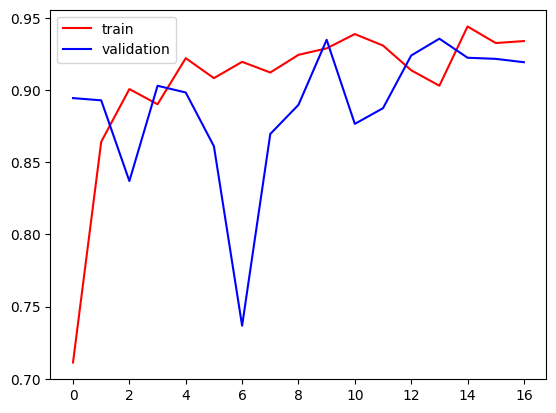

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

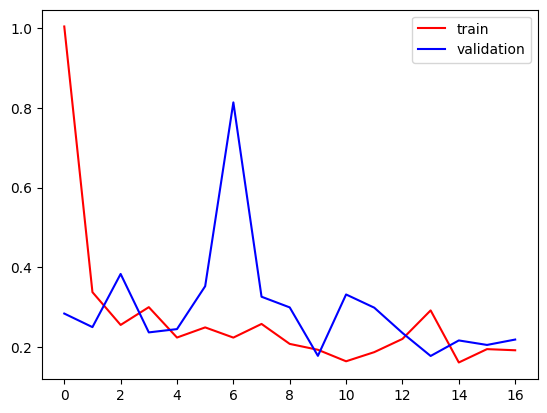

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
# Accuracy check from sklearn
y_pred=model.predict(test_data)
y_label=np.argmax(y_pred,axis=1)
y_test=test_data.classes
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_label)

26/26 [==============================] - 14s 441ms/step


0.9192546583850931

In [106]:
# precision and recall score
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_label,average=None))
print(recall_score(y_test,y_label,average=None))

[1.         0.80540541 0.96092796]
[0.85344828 0.94006309 0.92046784]


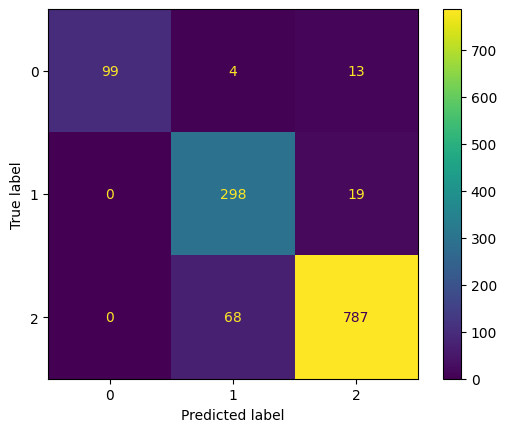

In [41]:
# Display confusion matrix using sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_label)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()

##Predictive System

In [146]:
image_path='/content/Data/train/PNEUMONIA/PNEUMONIA(1005).jpg'

In [150]:
img=load_img(image_path,target_size=(150,150))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)
model.predict(img).argmax(axis=1)

1/1 [==============================] - 0s 29ms/step


array([2])